In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

**Loding data**

In [255]:
data=pd.read_csv("sample_data.csv")
data.head(5)

,mmsi,timestamp,lat,lon
0,565761000,2023-03-15 00:27:44+00,1.26878,103.75827
1,538008084,2023-03-19 23:30:00+00,43.55962,10.29404
2,564654000,2023-03-12 08:22:53+00,1.23725,103.89135
3,529123000,2023-03-05 16:47:42+00,29.44367,48.93066
4,564780000,2023-03-11 06:35:20+00,1.27755,103.61026


                                                Data preprocessing

In [256]:
df = pd.DataFrame(data)
df.isnull().sum()

mmsi         0
timestamp    0
lat          0
lon          0
dtype: int64

In [258]:
# total number of unique instances 
tt=data['timestamp'].unique()
print('**Total number of unique time instances',len(tt),'**')
time_instant_counts = data['timestamp'].value_counts()
# time_instant_counts
count_=time_instant_counts.value_counts()
count_

**Total number of unique time instances 10916 **


count
1     10419
6        83
4        74
5        71
2        55
11       38
3        37
10       32
7        31
8        25
9        23
12       17
13        8
14        3
Name: count, dtype: int64

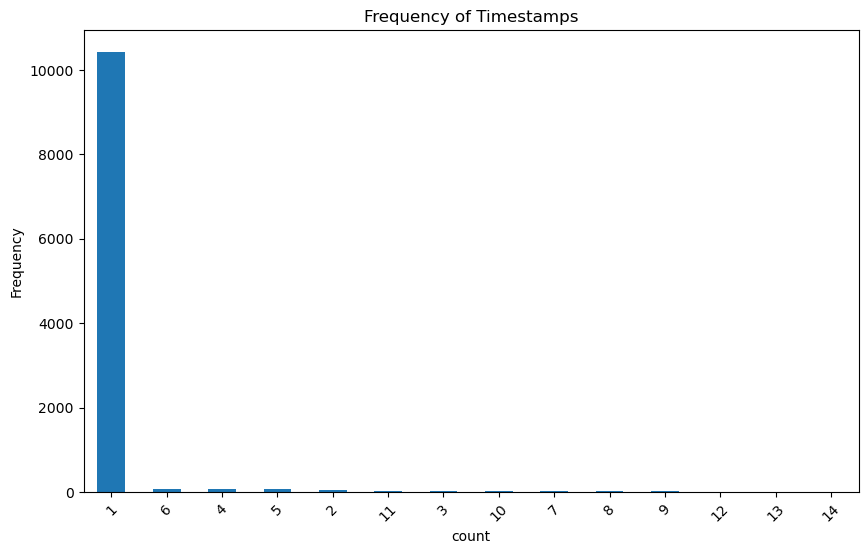

In [259]:
plt.figure(figsize=(10, 6))
count_.plot(kind='bar')
# plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamps')
plt.xticks(rotation=45)
plt.show()

**As we observe that there is hug number of unique (one time  time_stamps) so now can remove them, which wont effect the results and help in redusing computing time**

In [260]:
filtered_counts = time_instant_counts[time_instant_counts> 1]
filtered_counts
# filtered_counts.value_counts()

timestamp
2023-03-17 11:30:00+00    14
2023-03-17 13:30:00+00    14
2023-03-17 16:30:00+00    14
2023-03-15 09:30:00+00    13
2023-03-18 04:30:00+00    13
                          ..
2023-03-11 22:30:00+00     2
2023-03-24 04:44:17+00     2
2023-03-13 04:30:00+00     2
2023-03-08 00:08:21+00     2
2023-03-20 17:00:02+00     2
Name: count, Length: 497, dtype: int64

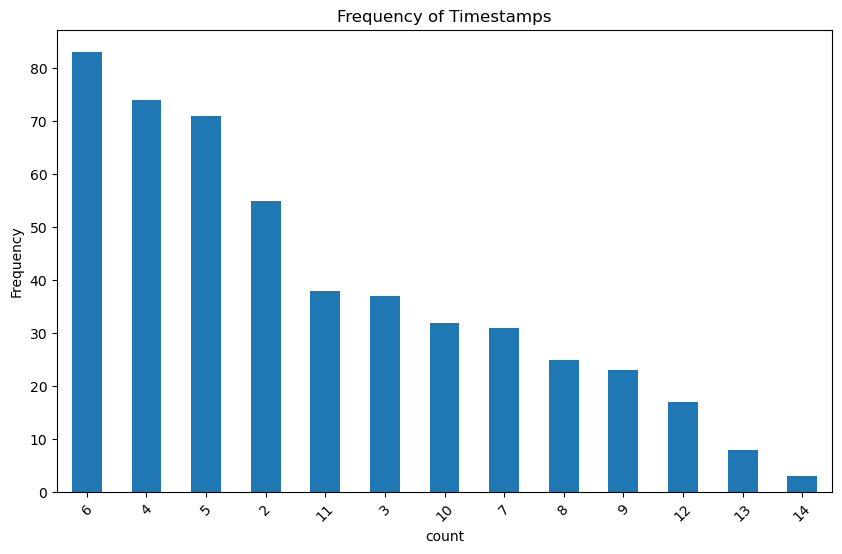

In [261]:
plt.figure(figsize=(10, 6))
filtered_counts.value_counts().plot(kind='bar')
# plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamps')
plt.xticks(rotation=45)
plt.show()

**Updated data**

In [262]:
new_data = data[~data['timestamp'].isin(time_instant_counts[time_instant_counts == 1].index)]
new_data

,mmsi,timestamp,lat,lon
1,538008084,2023-03-19 23:30:00+00,43.559620,10.294040
5,563014650,2023-03-05 16:30:00+00,1.299526,103.950451
14,564780000,2023-03-07 20:30:00+00,1.302853,103.968487
15,529123000,2023-03-17 02:30:00+00,29.680330,48.811670
18,352656000,2023-03-05 13:30:00+00,8.852705,-79.516862
...,...,...,...,...
13480,352656000,2023-03-18 22:30:00+00,8.813440,-79.610260
13481,563014650,2023-03-23 19:30:00+00,1.297897,103.947240
13485,563078430,2023-03-07 01:30:00+00,1.278240,103.429909
13496,218719092,2023-03-21 08:30:00+00,44.168871,9.104404


**Visulizing the unique vessel head count**

        case1 -- Actual data
        case2 -- Modified data

In [263]:
tt=data['mmsi'].unique()
print('**Total number of unique vessel',len(tt),'mmsi**')
mmsi_counts = data['mmsi'].value_counts()
print(mmsi_counts)

**Total number of unique vessel 17 mmsi**
mmsi
564654000    4708
565761000    1647
563014650    1556
563078430    1332
564780000     807
529123000     702
352656000     678
518998309     619
538008064     338
538008084     301
352002300     194
232006548     159
232345740     147
875832716     130
898998797      75
218719092      61
889799564      47
Name: count, dtype: int64


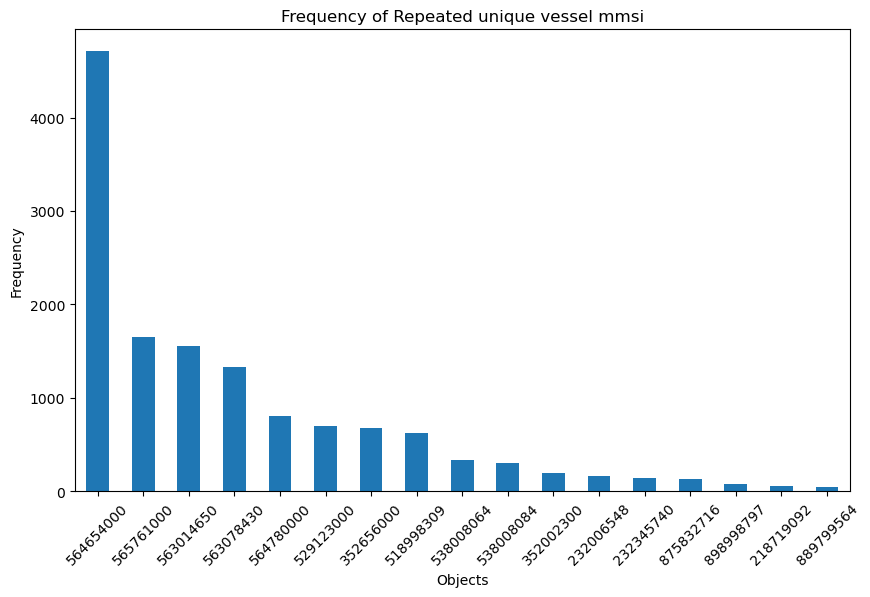

In [264]:
plt.figure(figsize=(10, 6))
mmsi_counts.plot(kind='bar')
plt.xlabel('Objects')
plt.ylabel('Frequency')
plt.title('Frequency of Repeated unique vessel mmsi')
plt.xticks(rotation=45)
plt.show()

mmsi
564780000    398
352656000    373
563078430    352
563014650    320
565761000    305
529123000    260
564654000    194
518998309    154
538008064    129
232006548    115
232345740    113
875832716     99
538008084     84
898998797     53
218719092     52
889799564     42
352002300     39
Name: count, dtype: int64


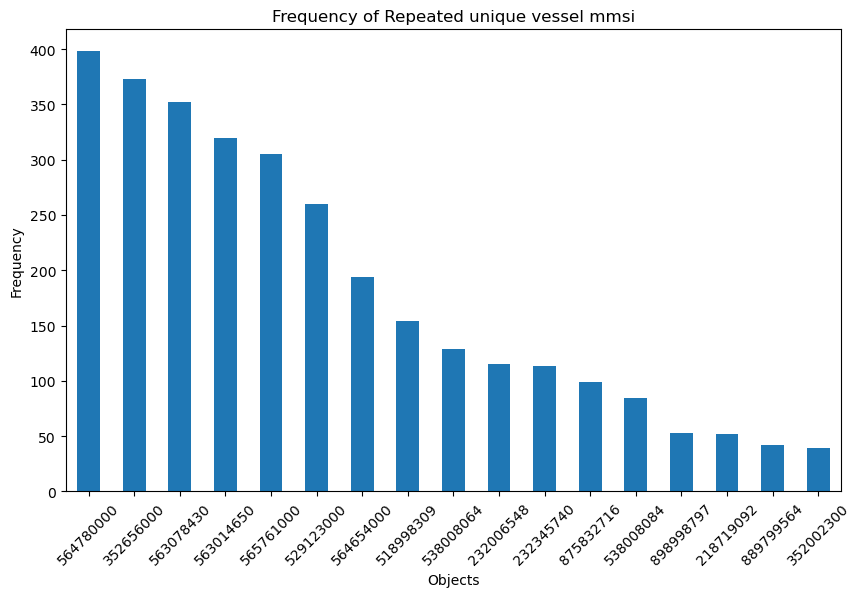

In [265]:
mmsi_counts_new = new_data['mmsi'].value_counts()
print(mmsi_counts_new)
plt.figure(figsize=(10, 6))
mmsi_counts_new.plot(kind='bar')
plt.xlabel('Objects')
plt.ylabel('Frequency')
plt.title('Frequency of Repeated unique vessel mmsi')
plt.xticks(rotation=45)
plt.show()

                **calculation for all data**  

In [3]:

# def haversine(lat1, lon1, lat2, lon2):
#     R = 6371  # Radius of the Earth in kilometers
#     lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1
#     a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
#     c = 2 * np.arcsin(np.sqrt(a))
#     distance = R * c  # Distance in kilometers
#     return distance

# # Define the proximity threshold in kilometers (e.g., 0.1 km = 100 meters)
# proximity_threshold = 0.1

# # List to store proximity events
# proximity_events = []

# # Iterate over the dataset to check proximity between vessels
# for i, vessel1 in data.iterrows():
#     for j, vessel2 in data.iterrows():
#         if i != j and vessel1['timestamp'] == vessel2['timestamp']:
#             distance = haversine(vessel1['lat'], vessel1['lon'], vessel2['lat'], vessel2['lon'])
#             if distance <= proximity_threshold:
#                 proximity_events.append({
#                     'mmsi': vessel1['mmsi'],
#                     'vessel_proximity': vessel2['mmsi'],
#                     'timestamp': vessel1['timestamp']
#                 })

# # Convert proximity events to a DataFrame
# proximity_df = pd.DataFrame(proximity_events)

# # Show a few proximity events
# proximity_df.head()


,mmsi,vessel_proximity,timestamp
0,232006548,232345740,2023-03-15 03:30:00+00
1,232006548,875832716,2023-03-15 03:30:00+00
2,232006548,218719092,2023-03-15 03:30:00+00
3,232006548,889799564,2023-03-15 03:30:00+00
4,352656000,538008064,2023-03-14 13:30:00+00


            **calculation for filtered data**

In [247]:
# Function to calculate the Haversine distance between two points
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c  # Distance in kilometers
    return distance

# Define the proximity threshold in kilometers (e.g., 0.1 km = 100 meters)
proximity_threshold = 0.1

# List to store proximity events
proximity_events = []

# Iterate over the dataset to check proximity between vessels
for i, vessel1 in new_data.iterrows():
    for j, vessel2 in new_data.iterrows():
        if i != j and vessel1['timestamp'] == vessel2['timestamp']:
            distance = haversine(vessel1['lat'], vessel1['lon'], vessel2['lat'], vessel2['lon'])
            if distance <= proximity_threshold:
                proximity_events.append({
                    'mmsi': vessel1['mmsi'],
                    'vessel_proximity': vessel2['mmsi'],
                    'timestamp': vessel1['timestamp']
                })
            

# Convert proximity events to a DataFrame
result_with_filterd_data = pd.DataFrame(proximity_events)

# Show a few proximity events
result_with_filterd_data .head()


,mmsi,vessel_proximity,timestamp
0,232006548,232345740,2023-03-15 03:30:00+00
1,232006548,875832716,2023-03-15 03:30:00+00
2,232006548,218719092,2023-03-15 03:30:00+00
3,232006548,889799564,2023-03-15 03:30:00+00
4,352656000,538008064,2023-03-14 13:30:00+00


In [272]:
# Group by 'mmsi' and 'timestamp', then aggregate 'vessel_proximity' into a set
proximity_df_grouped = result_with_filterd_data.groupby(['mmsi', 'timestamp'])['vessel_proximity'].apply(lambda x: set(x)).reset_index()
proximity_df_grouped

,mmsi,timestamp,vessel_proximity
0,218719092,2023-03-15 01:30:00+00,"{232006548, 232345740, 875832716, 889799564}"
1,218719092,2023-03-15 02:30:00+00,"{889799564, 232345740, 232006548, 875832716}"
2,218719092,2023-03-15 03:30:00+00,"{232345740, 232006548, 889799564, 875832716}"
3,218719092,2023-03-15 04:30:00+00,"{889799564, 232345740, 232006548, 875832716}"
4,218719092,2023-03-15 05:30:00+00,"{232006548, 232345740, 889799564, 875832716}"
...,...,...,...
180,889799564,2023-03-15 08:30:00+00,"{218719092, 232006548, 232345740, 875832716}"
181,889799564,2023-03-15 09:30:00+00,"{218719092, 232345740, 875832716, 232006548}"
182,889799564,2023-03-15 10:30:00+00,"{232006548, 875832716}"
183,889799564,2023-03-16 01:30:00+00,{232006548}


In [273]:
# Group by 'mmsi' and 'timestamp', then aggregate 'vessel_proximity' into a set
proximity_df_grouped_2 = result_with_filterd_data.groupby(['timestamp'])['vessel_proximity'].apply(lambda x: set(x)).reset_index()
proximity_df_grouped_2

,timestamp,vessel_proximity
0,2023-03-12 14:30:00+00,"{565761000, 352002300}"
1,2023-03-12 15:30:00+00,"{565761000, 352002300}"
2,2023-03-12 16:30:00+00,"{565761000, 352002300}"
3,2023-03-12 21:30:00+00,"{563014650, 352002300}"
4,2023-03-12 22:30:00+00,"{563014650, 352002300}"
...,...,...
75,2023-03-24 04:56:09+00,{352656000}
76,2023-03-24 04:58:16+00,{564780000}
77,2023-03-24 04:58:36+00,{563014650}
78,2023-03-24 04:58:52+00,{563078430}


In [211]:
# proximity_df_grouped2['vessel_proximity'] = proximity_df_grouped2['vessel_proximity'].apply(lambda x: {int(i) for i in x})
# proximity_df_grouped.to_csv('proximity_data.csv', index=False)

In [283]:
proximity_df_grouped2.to_csv('Results.csv', index=False)

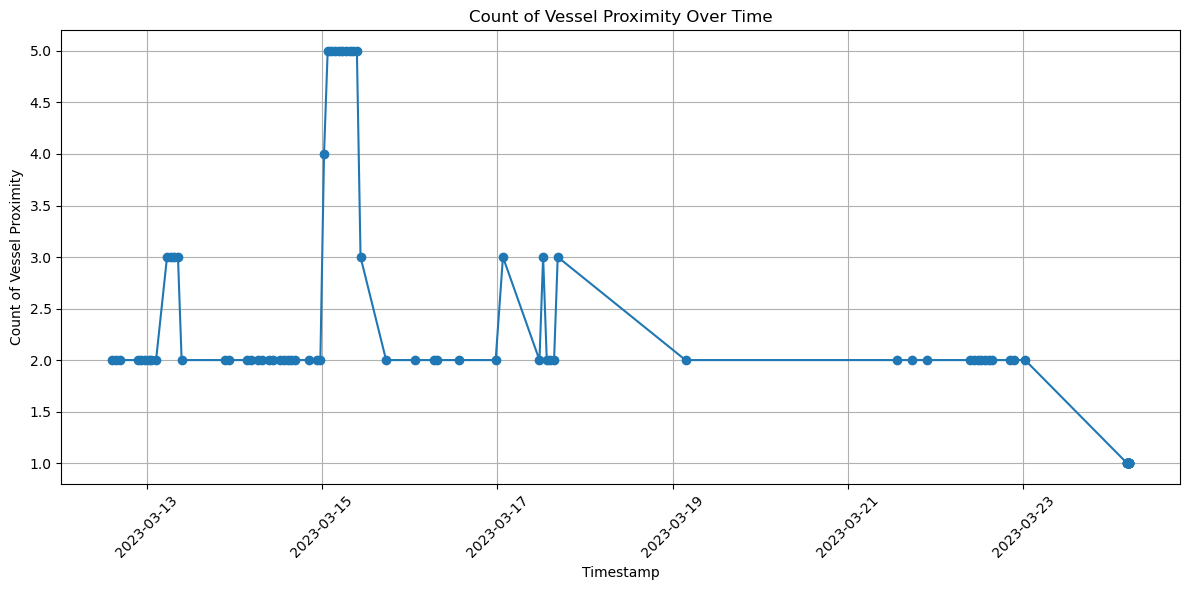

In [278]:
df = pd.DataFrame(proximity_df_grouped_2)
# Convert timestamps to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Count number of vessels for each timestamp
df['vessel_count'] = df['vessel_proximity'].apply(len)

# Group by timestamp and sum the counts if there are multiple entries per timestamp
df_grouped = df.groupby('timestamp', as_index=False).sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['timestamp'], df_grouped['vessel_count'], marker='o', linestyle='-')

# Adding titles and labels
plt.title('Count of Vessel Proximity Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Count of Vessel Proximity')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()